## Code:
    Here we simulate the random walk in n-dimensions. First we check the possibility of returning to origin within 
    a given number of steps. Then we estimate the probability of return in given number of trials.
    

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def random_walk(dimension, steps):
    """
    Function to determine if the return to origin is possible
    within given number of steps.
    """
    cood = [0 for _ in range(dimension)] # origin coordinate
    for _ in range(steps):
        cood[np.random.randint(dimension)] += np.random.choice([1,-1], p=[0.5, 0.5]) # add +1/-1 randomly with prob 0.5
        if not any(cood): # check iterable 
            #print(cood)
            return True
    return False

"""
To get the probability we repeat the random walk for given number of trials.
Fraction return to zero is the probability.
"""

def rw_prob(dimension, steps, trials):
    """
    Probability of returning to zero
    """
    return np.mean([random_walk(dimension, steps) for _ in range(trials)])



### Plottong the probability vs # of steps 

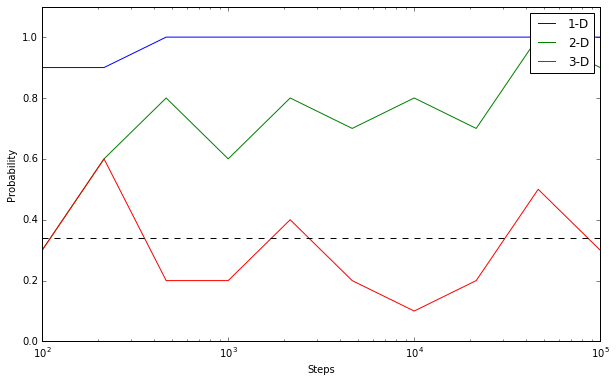

In [2]:
%matplotlib inline

plt.figure(figsize=(10,6))
steps = np.logspace(2,5,10, dtype= int)
dims = [1, 2, 3]

for dim in dims:
    prob = [rw_prob(dim, _, 10) for _ in steps]
    plt.plot(steps, prob, label = '{0}-D'.format(dim))

plt.plot(steps, [0.34]* len(steps), '--', c='k') # dash line is 0.34 
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.xscale('log')
plt.legend()

### Verification
The dependance of return probability on dimension was explained by George Polya.
He proved that simple random walk is recurrent in dimension d = 1, 2 and transient in dimension d ≥ 3.
i.e. it is certain that return to origin for d = 1,2, but probability is less than one for d ≥ 3. 
In fact for 3-D probability is ~ 0.34.

Our solution is in agreement with 1-D and 3-D solution, and  for 2-D I would expect that the probability should approach 1 for higher number of steps.

ref:
http://mathworld.wolfram.com/PolyasRandomWalkConstants.html
http://websites.math.leidenuniv.nl/probability/lecturenotes/RandomWalks.pdf